<a href="https://colab.research.google.com/github/mugesram/Point-Operations-Spatial-Filtering/blob/main/Assignment_1_vision_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

indensity transformation

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


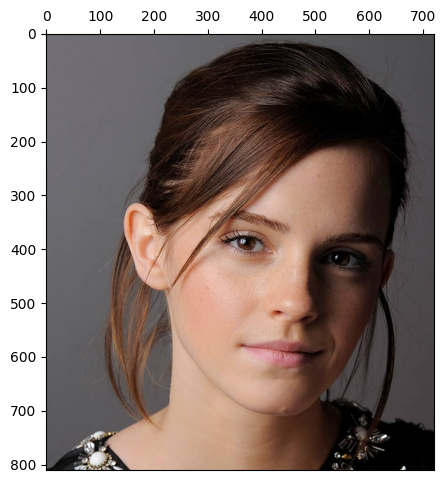

In [ ]:
# Reading Image
image = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/emma.jpg")

fix,ax = plt.subplots(1,1,figsize=(5,8))
ax.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()

256


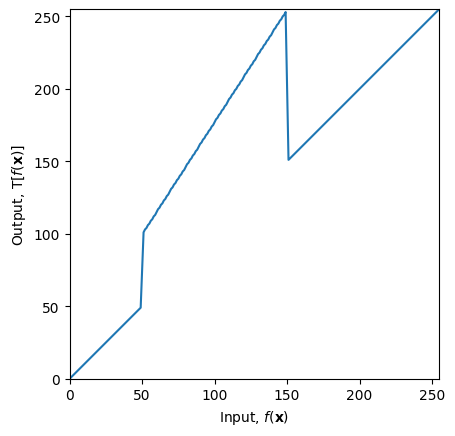

In [ ]:
# Making transform function
t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,101)
t3 = np.linspace(150,255,106)
t1[-1] = (t1[-1] + t2[0])/2
t2 = np.delete(t2,0)
t2[-1] = (t2[-1] + t3[0])/2
t3 = np.delete(t3,0)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

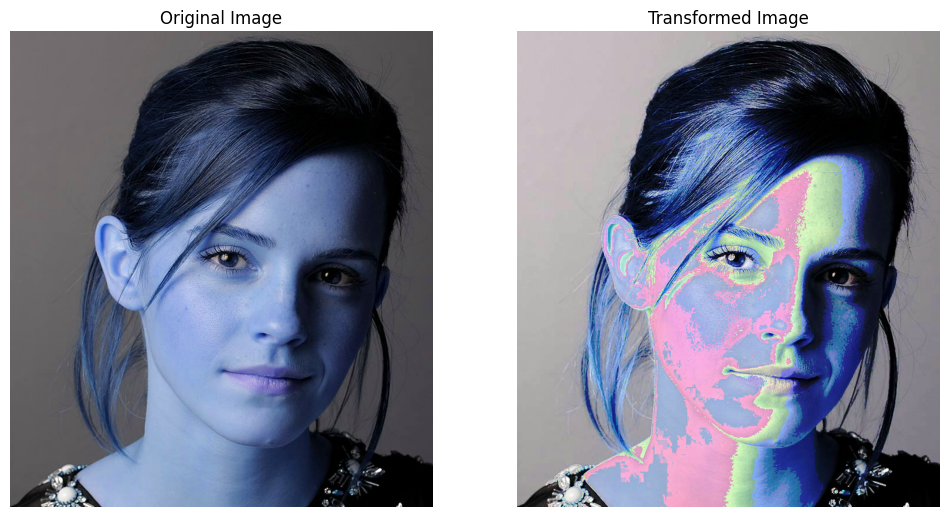

In [ ]:
# implementing transformation
transformed_image = cv.LUT(image, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

Brain Image Analysis

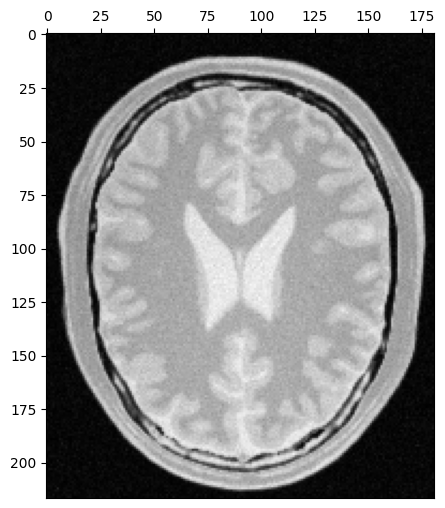

(217, 181, 3)

In [4]:
# Reading Image
image = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/brain_proton_density_slice.png")

fix,ax = plt.subplots(1,1,figsize=(5,8))
cvt_img = cv.cvtColor(image,cv.COLOR_BGR2RGB)
ax.imshow(cvt_img)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()
cvt_img.shape


In [25]:
# need to find intensity ranges of each matters
# finding Idensity range of grey matters
min = 255
max = 0
total = np.uint32(0)
n = 0
for i in range(110,120):
  for j in range(50,55):
    v = np.uint32(cvt_img[i][j][0])
    total += v
    n += 1
    if min > v:
      min = v
    if max < v:
      max = v
print(min,max)
print(total/n)

158 191
169.4


In [26]:
# finding Indensity range of white matters
min = 255
max = 0
total = np.uint32(0)
n = 0
for i in range(50,55):
  for j in range(45,50):
    v = np.uint32(cvt_img[i][j][0])
    total += v
    n += 1
    if min > v:
      min = v
    if max < v:
      max = v
print(min,max)
print(total/n)

168 192
180.76


In [18]:
cvt_img[100][75]

array([230, 230, 230], dtype=uint8)

white matters 180-200, grey matter 150-175

In [58]:
# accentuating white matter
lb = 150
ub = 175
t1 = np.array([0]*lb)
t2 = np.linspace(lb,ub,ub-lb)
t3 = np.array([0]*(256-ub))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

256


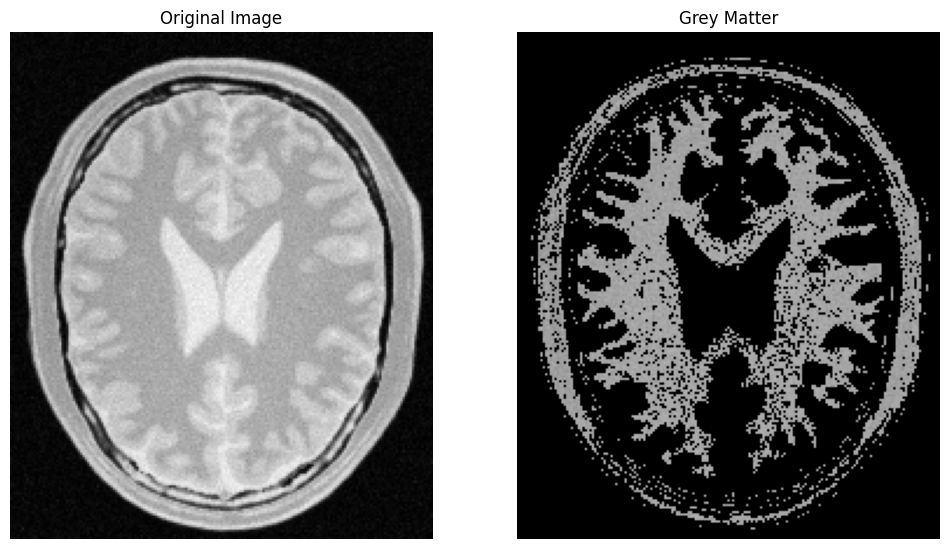

In [59]:
transformed_image = cv.LUT(cvt_img, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cvt_img)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Grey Matter')
for a in ax:
    a.axis('off')
plt.show()

In [62]:
# accentuating grey matter
lb = 180
ub = 210
t1 = np.array([0]*lb)
t2 = np.linspace(lb,ub,ub-lb)
t3 = np.array([0]*(256-ub))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

256


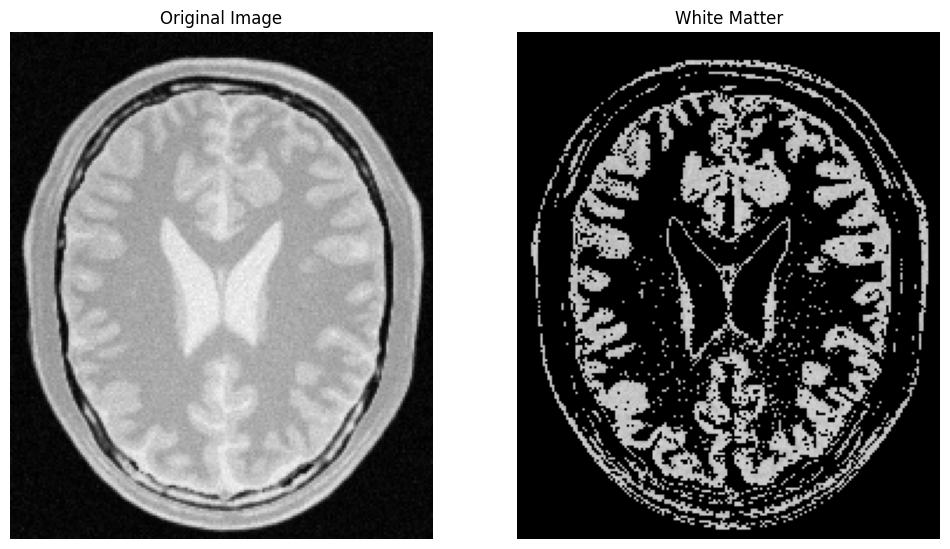

In [63]:
transformed_image = cv.LUT(cvt_img, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cvt_img)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('White Matter')
for a in ax:
    a.axis('off')
plt.show()

Final Range After Test  :   white matters 180-210, grey matter 150-175